## <h3 align="center">Homework 3</h3> 




I chose the forest fires data set form the UCI machine learnign repository. It is a dataset that tries to predict the extent of forest fires in the northeast region of Portugal, given the following attributes:
* X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
* Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
* Month - Jan to Dec
* Day - mon to sun
* Fine Fuel Moisture Code (FFMC)
* Duff Moisture Code (DMC)
* Drought Code (DC)
* Initial Spread Index (ISI)
* Temperature 
* Relative humidity (RH) 
* Wind speed  
* Rain
* Area burnt


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('forestfires.csv')
 
print("Attributes:")
print(df.columns)


Attributes:
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


Listing out the largest forest fires in the dataset

In [3]:
df[df.loc[:,'area'] > 100]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
232,6,4,sep,tue,91.0,129.5,692.6,7.0,18.7,43,2.7,0.0,103.39
233,9,4,sep,tue,84.4,73.4,671.9,3.2,24.3,36,3.1,0.0,105.66
234,4,5,sep,sat,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0,154.88
235,8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
377,2,2,aug,sat,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
420,8,8,aug,wed,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76


Sorting the dataset to show descending order of area burnt

In [4]:
df2=df.sort_values(by='area',ascending=False).copy(deep=True)

In [5]:
df2.iloc[0:9,[2,3,12]] # month and day of the top ten fires

,month,day,area
238,sep,sat,1090.84
415,aug,thu,746.28
479,jul,mon,278.53
237,sep,tue,212.88
236,sep,sat,200.94
235,aug,sun,196.48
420,aug,wed,185.76
377,aug,sat,174.63
234,sep,sat,154.88


In [6]:
grouped=df2.groupby(['month']).sum().copy(deep=True)
print('Forest fires sorted by total area burnt in each month')
grouped.sort_values(by='area',ascending=False).loc[:,'area']

Forest fires sorted by total area burnt in each month


month
sep    3086.13
aug    2297.99
jul     459.83
mar     235.26
feb     125.50
dec     119.97
oct      99.57
jun      99.30
apr      80.02
may      38.48
jan       0.00
nov       0.00
Name: area, dtype: float64

In [28]:
sort_month=grouped.loc[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],:].copy(deep=True)
print('Overall rainfall and area burnt each month')
sort_month.loc[:,['rain','area']]


Overall rainfall and area burnt each month


,rain,area
month,,
jan,0.0,0.00
feb,0.0,125.50
mar,0.2,235.26
apr,0.0,80.02
may,0.0,38.48
jun,0.0,99.30
jul,0.2,459.83
aug,10.8,2297.99
sep,0.0,3086.13


As expected the summer months have the largest fires. Though august received the maximum rainfall, it doesn't seem to have stopped the spread of the fire. 

In [36]:
grouped_2d=df2.groupby(['month','day']).sum().copy(deep=True)

In [9]:
%matplotlib inline
import seaborn as sns

Distribution of fires amoung different months


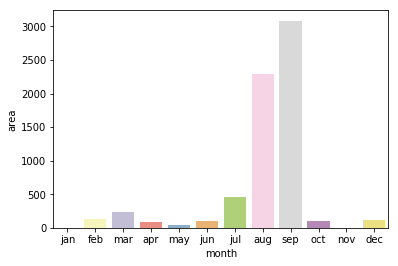

In [31]:
print('Distribution of fires amoung different months')
sns.barplot(sort_month.index, sort_month['area'], palette="Set3");

Text(0.5,1,'Location and size of fire within the park map')

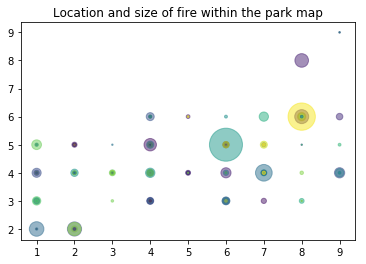

In [11]:
import matplotlib.pyplot as plt
color = np.random.rand(len(df.index))
plt.scatter(df['X'], df['Y'], s=df['area'], c=color, alpha=0.5)
plt.title('Location and size of fire within the park map');

Looking at correlation between the attributes


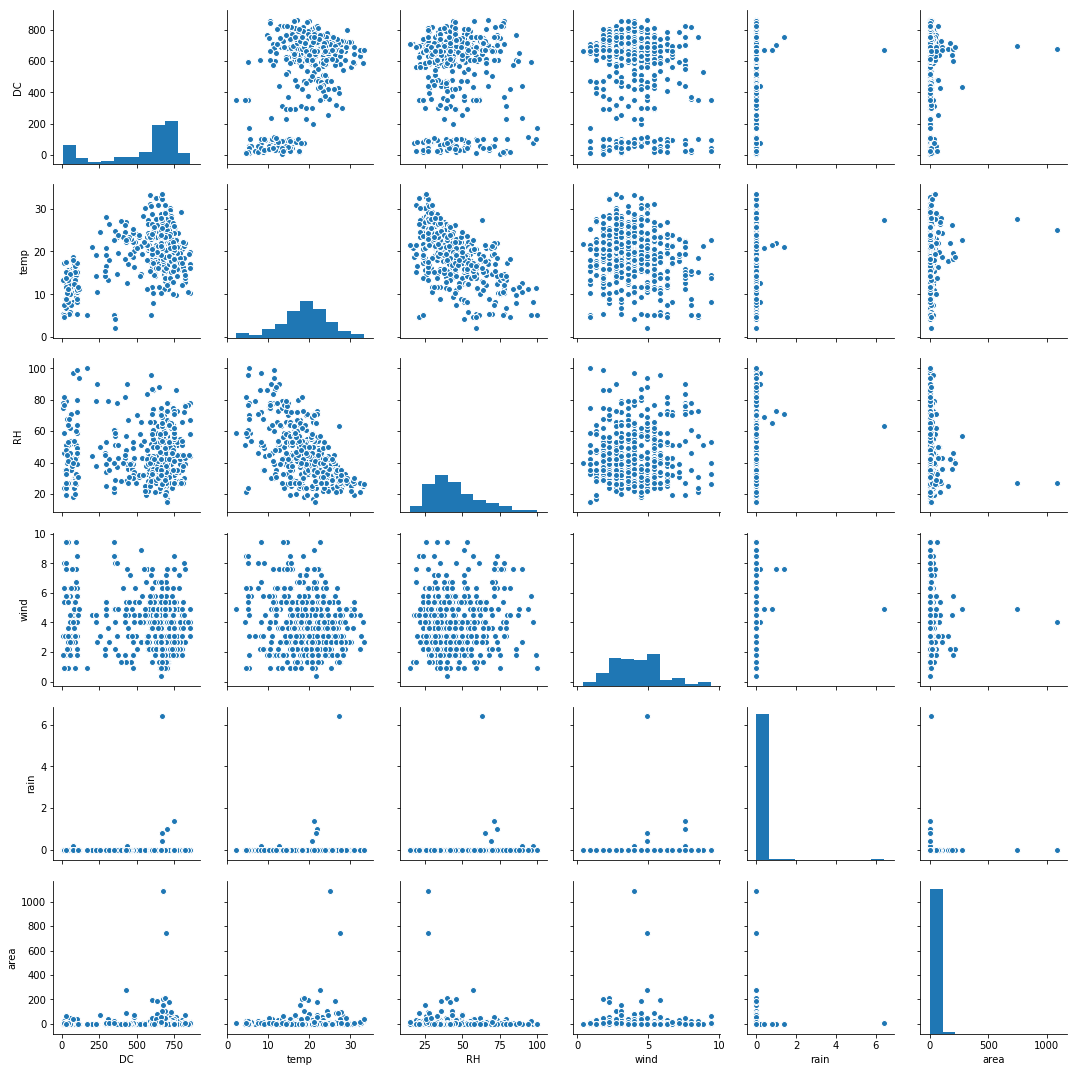

In [40]:
print('Looking at correlation between the attributes')
sns.pairplot(df,x_vars=[ 'DC', 'temp', 'RH',
       'wind', 'rain','area'],y_vars=['DC', 'temp', 'RH',
       'wind', 'rain','area']);

The values of area burnt variable are highly skewed to 0. In order to see relationships better the log of this value is taken.

In [ ]:
log_df=df.assign(log_area=np.log(df['area']+1)).copy(deep=True)
sns.pairplot(log_df,x_vars=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'],y_vars=['log_area'])

These scatter plots show that there is no clear correlation between any of the attributes and the forest area burnt. 
But as seen in the previos plot, there is a positive correlation between the temperature and the drought coefficient. As expected drought code increases with temperature.

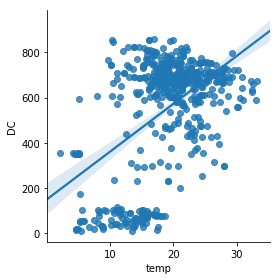

In [14]:
sns.lmplot(x='temp', y='DC',data=log_df, x_jitter=.1,size=4);

Fitting a linear model between the drought code and temperature:

In [43]:
from scipy import stats
import statsmodels.api as sm
model = sm.OLS(log_df['DC'], log_df['temp'])
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     DC   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     3358.
Date:                Wed, 31 Jan 2018   Prob (F-statistic):          4.95e-228
Time:                        16:20:05   Log-Likelihood:                -3520.9
No. Observations:                 517   AIC:                             7044.
Df Residuals:                     516   BIC:                             7048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp          28.3351      0.489     57.948      0.0

In [49]:
result.pvalues

temp    4.947391e-228
dtype: float64

The model account for 86.7% of the variance in the data as seen from the $R^2$ value. The low p-value suggests that there is a strong corelation between temperature and DC, and that changes in DC are associated with the changes in temperature.

In [39]:
import statsmodels.formula.api as smf
result2 = smf.ols('log_area ~ temp + wind', data=log_df).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.455
Date:                Wed, 31 Jan 2018   Prob (F-statistic):             0.0869
Time:                        16:10:44   Log-Likelihood:                -904.01
No. Observations:                 517   AIC:                             1814.
Df Residuals:                     514   BIC:                             1827.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5199      0.281      1.850      0.0

Any combination of attributes could not give a good model fit between the attributes, and burnt forest area as the area burnt values are highly skewed towards zero. The $R^2$ value was low, and p-value for each attribute was also high. 